## Movie Ratings Analysis (IMDB Dataset)

In [7]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

df = pd.read_csv('movie_metadata.csv')
df.head()

conn = sqlite3.connect('imdb_movies.db')
df.to_sql('movie_metadata', conn, if_exists='replace', index=False)

5043

## Column Descriptions

The table below provides a description of each column in the IMDb dataset, along with a representative example:

- **color**: Film color format.
  e.g., "Color", "Black & White"

- **director_name**: Name of the film's director.
  e.g., "Christopher Nolan"

- **num_critic_for_reviews**: Number of critical reviews recorded on IMDb.
  e.g., 723

- **duration**: Runtime of the movie in minutes.
  e.g., 22000

- **actor_3_facebook_likes**: Facebook likes for the third-billed actor.
  e.g., 855

- **actor_2_name**: Name of the second-billed actor.
  e.g., "Sam Worthington"

- **actor_1_facebook_likes**: Facebook likes for the lead actor.
  e.g., 10000

- **gross**: Box office earning in USD.
  e.g., 760505847

- **genres**: Pipe-separated list of genres.
  e.g., "Action/Adventure/Fantasy"

- **actor_1_name**: Name of the lead actor.
  e.g., "Leonardo DiCaprio"

- **movie_title**: Title of the movie.
  e.g., "Inception"

- **num_voted_users**: Number of IMDb user votes.
  e.g., 886204

- **cast_total_facebook_likes**: Sum of all main cast's Facebook likes.
  e.g., 48350

- **actor_3_name**: Name of the third-billed actor.
  e.g., "Tom Hardy"

- **facenumber_in_poster**: Number of faces shown on the movie poster.
  e.g., 1

- **plot_keywords**: Pipe-separated keywords describing the plot.
  e.g., "dream/subconscious/thief"

- **movie_imdb_link**: IMDb URL for the movie.
  e.g., "http://www.imdb.com/title/tt1375666/"

- **language**: Language of the movie's dialogue.
  e.g., "English"

- **country**: Country of production.
  e.g., "USA"

- **content_rating**: Film's rating (MPAA or equivalent).
  e.g., "PG-13"

- **budget**: Estimated production budget in USD.
  e.g., 160000000

- **title_year**: Year the movie was released.
  e.g., 2010

- **actor_2_facebook_likes**: Facebook likes for the second-billed actor.
  e.g., 5000

- **imdb_score**: IMDb rating on a scale of 1-10.
  e.g., 8.8

- **aspect_ratio**: Aspect ratio used in the film (e.g., widescreen).
  e.g., 2.35

- **movie_facebook_likes**: Facebook likes for the movie page.
  e.g., 33000

In [2]:
for col in df.columns:
    sample_value = df[col].dropna().iloc[0] if not df[col].dropna().empty else "No data"
    print(f"- **{col}**: Example → _{sample_value}_")

- **color**: Example → _Color_
- **director_name**: Example → _James Cameron_
- **num_critic_for_reviews**: Example → _723.0_
- **duration**: Example → _178.0_
- **director_facebook_likes**: Example → _0.0_
- **actor_3_facebook_likes**: Example → _855.0_
- **actor_2_name**: Example → _Joel David Moore_
- **actor_1_facebook_likes**: Example → _1000.0_
- **gross**: Example → _760505847.0_
- **genres**: Example → _Action|Adventure|Fantasy|Sci-Fi_
- **actor_1_name**: Example → _CCH Pounder_
- **movie_title**: Example → _Avatar _
- **num_voted_users**: Example → _886204_
- **cast_total_facebook_likes**: Example → _4834_
- **actor_3_name**: Example → _Wes Studi_
- **facenumber_in_poster**: Example → _0.0_
- **plot_keywords**: Example → _avatar|future|marine|native|paraplegic_
- **movie_imdb_link**: Example → _http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1_
- **num_user_for_reviews**: Example → _3054.0_
- **language**: Example → _English_
- **country**: Example → _USA_
- **content_ratin

## Top 10 Movies by IMDb Score. 

In [14]:
query = '''
SELECT movie_title, imdb_score
FROM movie_metadata
WHERE imdb_score IS NOT NULL
ORDER BY imdb_score DESC
LIMIT 10
'''
top_rated = pd.read_sql_query(query, conn)
top_rated

,movie_title,imdb_score
0,Towering Inferno,9.5
1,The Shawshank Redemption,9.3
2,The Godfather,9.2
3,Dekalog,9.1
4,Dekalog,9.1
5,Kickboxer: Vengeance,9.1
6,The Dark Knight,9.0
7,The Godfather: Part II,9.0
8,Fargo,9.0
9,The Lord of the Rings: The Return of the King,8.9


## Top 10 IMDb Movies by Score Visual: 

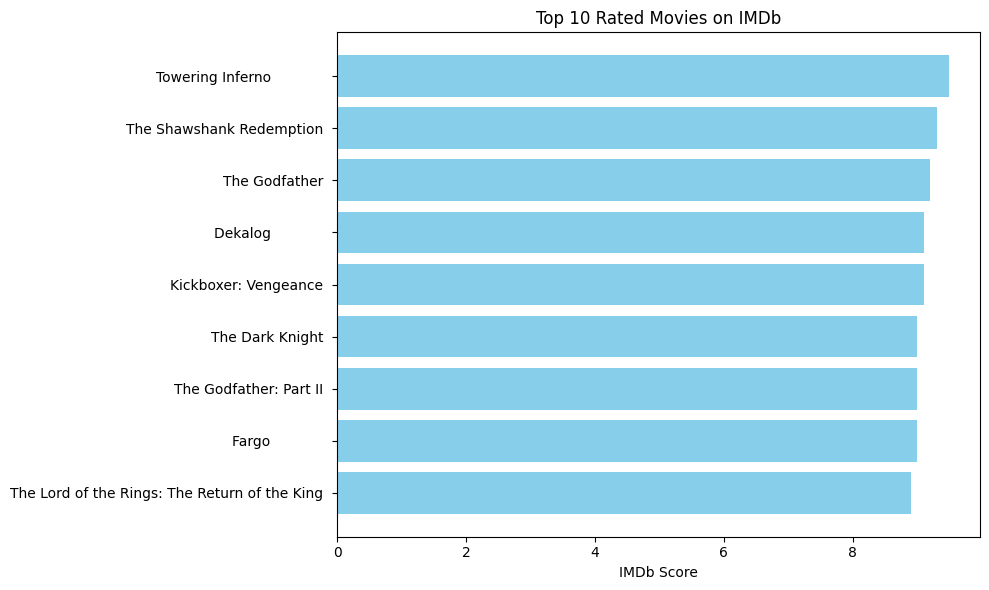

In [11]:
plt.figure(figsize=(10, 6))
plt.barh(top_rated['movie_title'], top_rated['imdb_score'], color='skyblue')
plt.xlabel('IMDb Score')
plt.title('Top 10 Rated Movies on IMDb')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Top 15 Movies by Genre: 

In [30]:

query = '''
SELECT genres, COUNT(*) AS movie_count
FROM movie_metadata
WHERE genres IS NOT NULL
GROUP BY genres
ORDER BY movie_count DESC
LIMIT 15
'''

pd.read_sql_query(query, conn)

,genres,movie_count
0,Drama,236
1,Comedy,209
2,Comedy|Drama,191
3,Comedy|Drama|Romance,187
4,Comedy|Romance,158
5,Drama|Romance,152
6,Crime|Drama|Thriller,101
7,Horror,71
8,Action|Crime|Drama|Thriller,68
9,Action|Crime|Thriller,65


In [16]:
# The following query displays average Score by Directory (min of 3 films). 

query = '''
SELECT director_name, COUNT(*) AS num_movies, AVG(imdb_score) AS avg_score
FROM movie_metadata
WHERE director_name IS NOT NULL AND imdb_score IS NOT NULL
GROUP BY director_name
HAVING COUNT(*) >= 3
ORDER BY avg_score DESC
LIMIT 10
'''

pd.read_sql_query(query, conn)

,director_name,num_movies,avg_score
0,Sergio Leone,4,8.475000
1,Christopher Nolan,8,8.425000
2,Pete Docter,3,8.233333
3,Hayao Miyazaki,4,8.225000
4,Quentin Tarantino,8,8.200000
5,Milos Forman,3,8.133333
6,Frank Capra,5,8.060000
7,Tony Kaye,3,8.033333
8,Stanley Kubrick,7,8.000000
9,David Lean,4,8.000000


## Average IMDb Score by Duration Category 

In [17]:
query = '''
SELECT
 CASE
   WHEN duration < 90 THEN 'Short (<90 min)'
   WHEN duration BETWEEN 90 AND 120 THEN 'Medium (90-120 min)'
   WHEN duration > 120 THEN 'Long (>120 min)'
   ELSE 'Uknown'
 END AS duration_category,
 COUNT(*) AS movie_count,
 ROUND(AVG(imdb_score), 2) AS avg_score
FROM movie_metadata
WHERE duration IS NOT NULL AND imdb_score IS NOT NULL
GROUP BY duration_category
ORDER BY avg_score DESC
'''

pd.read_sql_query(query, conn)

,duration_category,movie_count,avg_score
0,Long (>120 min),1067,7.05
1,Medium (90-120 min),3169,6.31
2,Short (<90 min),792,6.15


## Directors with the Highest Number of Films (Max 12)

In [18]:
query = '''
SELECT director_name, COUNT(*) AS film_count
FROM movie_metadata
WHERE director_name IS NOT NULL
GROUP BY director_name
ORDER BY film_count DESC
LIMIT 12
'''

pd.read_sql_query(query, conn)

,director_name,film_count
0,Steven Spielberg,26
1,Woody Allen,22
2,Martin Scorsese,20
3,Clint Eastwood,20
4,Ridley Scott,17
5,Tim Burton,16
6,Steven Soderbergh,16
7,Spike Lee,16
8,Renny Harlin,15
9,Oliver Stone,14


## Top 10 Most Liked Movies on Facebook

In [19]:
query = '''
SELECT movie_title, movie_facebook_likes
FROM movie_metadata
WHERE movie_facebook_likes IS NOT NULL
ORDER BY movie_facebook_likes DESC
LIMIT 10;
'''

pd.read_sql_query(query, conn)

,movie_title,movie_facebook_likes
0,Interstellar,349000
1,Django Unchained,199000
2,Batman v Superman: Dawn of Justice,197000
3,Mad Max: Fury Road,191000
4,The Revenant,190000
5,Inception,175000
6,The Hobbit: An Unexpected Journey,166000
7,The Imitation Game,165000
8,The Dark Knight Rises,164000
9,The Martian,153000


## Average IMDb Score by Budget

In [20]:
query = '''
SELECT 
    CASE
        WHEN budget < 10000000 THEN 'low (>$10M)'
        WHEN budget BETWEEN 10000000 AND 50000000 THEN 'Medium ($10M-$50M)'
        WHEN budget BETWEEN 50000000 AND 10000000 THEN 'High ($50M-$100M)'
        WHEN budget > 10000000 THEN 'Blockbuster (>$100M)'
        ELSE 'Unknown'
    END AS budget_category,
    COUNT(*) AS movie_count,
    ROUND(AVG(imdb_score), 2) AS avg_score
FROM movie_metadata
WHERE budget IS NOT NULL AND imdb_score IS NOT NULL
GROUP BY budget_category
ORDER BY avg_score DESC;
'''

pd.read_sql_query(query, conn)

,budget_category,movie_count,avg_score
0,low (>$10M),1457,6.49
1,Blockbuster (>$100M),945,6.49
2,Medium ($10M-$50M),2149,6.35


## Top 10 Highest-Grossing Movies

In [21]:
query = '''
SELECT movie_title, gross
FROM movie_metadata
WHERE gross IS NOT NULL
ORDER BY gross DESC
LIMIT 10;
'''

pd.read_sql_query(query, conn)

,movie_title,gross
0,Avatar,760505847.0
1,Titanic,658672302.0
2,Jurassic World,652177271.0
3,The Avengers,623279547.0
4,The Avengers,623279547.0
5,The Dark Knight,533316061.0
6,Star Wars: Episode I - The Phantom Menace,474544677.0
7,Star Wars: Episode IV - A New Hope,460935665.0
8,Avengers: Age of Ultron,458991599.0
9,The Dark Knight Rises,448130642.0


## Average IMDb Score by Gross Revenue Category. 

In [22]:
query = '''
SELECT
    CASE
        WHEN gross < 10000000 THEN 'Low ($10M)'
        WHEN gross BETWEEN 10000000 AND 50000000 THEN 'Moderate ($10M-$50M)'
        WHEN gross BETWEEN 50000000 AND 10000000 THEN 'High ($50M-$10M)'
        WHEN gross > 10000000 THEN 'Blockbuster (>$100M)'
        ELSE 'Unknown'
    END AS gross_category,
    COUNT(*) AS movie_count,
    ROUND(AVG(imdb_score), 2) AS avg_score
FROM movie_metadata
WHERE gross IS NOT NULL AND imdb_score IS NOT NULL
GROUP BY gross_category
ORDER BY avg_score DESC;
'''

pd.read_sql_query(query, conn)

,gross_category,movie_count,avg_score
0,Blockbuster (>$100M),1303,6.71
1,Low ($10M),1323,6.49
2,Moderate ($10M-$50M),1533,6.25


## Average IMDb Score by User Vote Count

In [23]:
query = '''
SELECT
    CASE
        WHEN num_voted_users < 50000 THEN 'Low (<50K votes)'
        WHEN num_voted_users BETWEEN 50000 AND 200000 THEN 'Moderate (50K-200K votes)'
        WHEN num_voted_users > 200000 THEN 'High (>200K votes)'
        ELSE 'Unknown'
    END AS vote_category,
    COUNT(*) AS movie_count,
    ROUND(AVG(imdb_score), 2) AS avg_score
FROM movie_metadata
WHERE num_voted_users IS NOT NULL AND imdb_score IS NOT NULL
GROUP BY vote_category
ORDER BY avg_score DESC;
'''

pd.read_sql_query(query, conn)

,vote_category,movie_count,avg_score
0,High (>200K votes),566,7.51
1,Moderate (50K-200K votes),1511,6.68
2,Low (<50K votes),2966,6.12


## Average IMDb Score by Content Rating. 

In [24]:
query = '''
SELECT content_rating,
    COUNT(*) AS movie_count,
    ROUND(AVG(imdb_score), 2) AS avg_score
FROM movie_metadata
WHERE content_rating IS NOT NULL AND imdb_score IS NOT NULL
GROUP BY  content_rating
ORDER BY avg_score DESC;
'''

pd.read_sql_query(query, conn)

,content_rating,movie_count,avg_score
0,TV-MA,20,8.25
1,TV-Y,1,7.40
2,TV-PG,13,7.35
3,Approved,55,7.33
4,TV-14,30,7.25
5,TV-Y7,1,7.20
6,Passed,9,7.17
7,Unrated,62,6.92
8,TV-G,10,6.92
9,GP,6,6.92


## Average IMDb Score by Release Year (title_year).

In [25]:
query = '''
SELECT 
    (title_year / 10) * 10 AS decade,
    COUNT(*) AS movie_count,
    ROUND(AVG(imdb_score), 2) AS avg_score
FROM movie_metadata
WHERE title_year IS NOT NULL AND imdb_score IS NOT NULL
GROUP BY decade
ORDER BY decade
'''

pd.read_sql_query(query, conn)

,decade,movie_count,avg_score
0,1916.0,1,8.00
1,1920.0,1,4.80
2,1925.0,1,8.30
3,1927.0,1,8.30
4,1929.0,2,7.15
...,...,...,...
86,2012.0,221,6.27
87,2013.0,237,6.37
88,2014.0,252,6.23
89,2015.0,226,6.03


## Average IMDb Score by Aspect Ratio

In [26]:
query = '''
SELECT aspect_ratio,
    COUNT(*) AS movie_count,
    ROUND(AVG(imdb_score), 2) AS avg_score
FROM movie_metadata
WHERE aspect_ratio IS NOT NULL AND imdb_score IS NOT NULL
GROUP BY aspect_ratio
ORDER BY avg_score DESC
'''

pd.read_sql_query(query, conn)

,aspect_ratio,movie_count,avg_score
0,1.18,1,8.50
1,1.75,3,7.90
2,1.20,1,7.80
3,4.00,7,7.67
4,2.24,1,7.60
5,1.44,1,7.50
6,2.20,15,7.41
7,2.76,3,7.37
8,2.40,3,7.23
9,16.00,45,7.19


## Average IMDb Score by Language 

In [27]:
query = '''
SELECT language,
    COUNT(*) AS movie_count,
    ROUND(AVG(imdb_score), 2) AS avg_score
FROM movie_metadata
WHERE language IS NOT NULL AND imdb_score IS NOT NULL
GROUP BY language
ORDER BY avg_score DESC
'''

pd.read_sql_query(query, conn)

,language,movie_count,avg_score
0,Telugu,1,8.40
1,Polish,4,8.25
2,Indonesian,2,7.90
3,Maya,1,7.80
4,Persian,4,7.58
5,Hebrew,5,7.58
6,Icelandic,2,7.55
7,Dzongkha,1,7.50
8,Dari,2,7.50
9,Danish,5,7.50


## Average IMDb Score by Cast Popularity

In [28]:
query = '''
SELECT 
    CASE
        WHEN cast_total_facebook_likes < 5000 THEN 'Low (<5K likes)'
        WHEN cast_total_facebook_likes BETWEEN 5000 AND 15000 THEN 'Moderate (5K-15K likes)'
        WHEN cast_total_facebook_likes > 15000 THEN 'High (>15K likes)'
        ELSE 'Unknown'
    END AS cast_popularity,
    COUNT(*) AS movie_count,
    ROUND(AVG(imdb_score), 2) AS avg_score
FROM movie_metadata
WHERE cast_total_facebook_likes IS NOT NULL AND imdb_score IS NOT NULL
GROUP BY cast_popularity
ORDER BY avg_score DESC;
'''

pd.read_sql_query(query, conn)

,cast_popularity,movie_count,avg_score
0,High (>15K likes),1136,6.71
1,Moderate (5K-15K likes),739,6.48
2,Low (<5K likes),3168,6.34


## IMDb Score vs. The Number of Faces in Movie Poster 

In [29]:
query = '''
SELECT 
    facenumber_in_poster,
    COUNT(*) AS movie_count,
    ROUND(AVG(imdb_score), 2) AS avg_score
FROM movie_metadata
WHERE facenumber_in_poster IS NOT NULL AND imdb_score IS NOT NULL
GROUP BY facenumber_in_poster
ORDER BY avg_score DESC;
'''

pd.read_sql_query(query, conn)

,facenumber_in_poster,movie_count,avg_score
0,43.0,1,7.70
1,14.0,1,7.40
2,31.0,1,7.10
3,15.0,6,6.63
4,0.0,2152,6.51
5,1.0,1251,6.47
6,8.0,37,6.41
7,2.0,716,6.38
8,3.0,380,6.37
9,12.0,4,6.30
